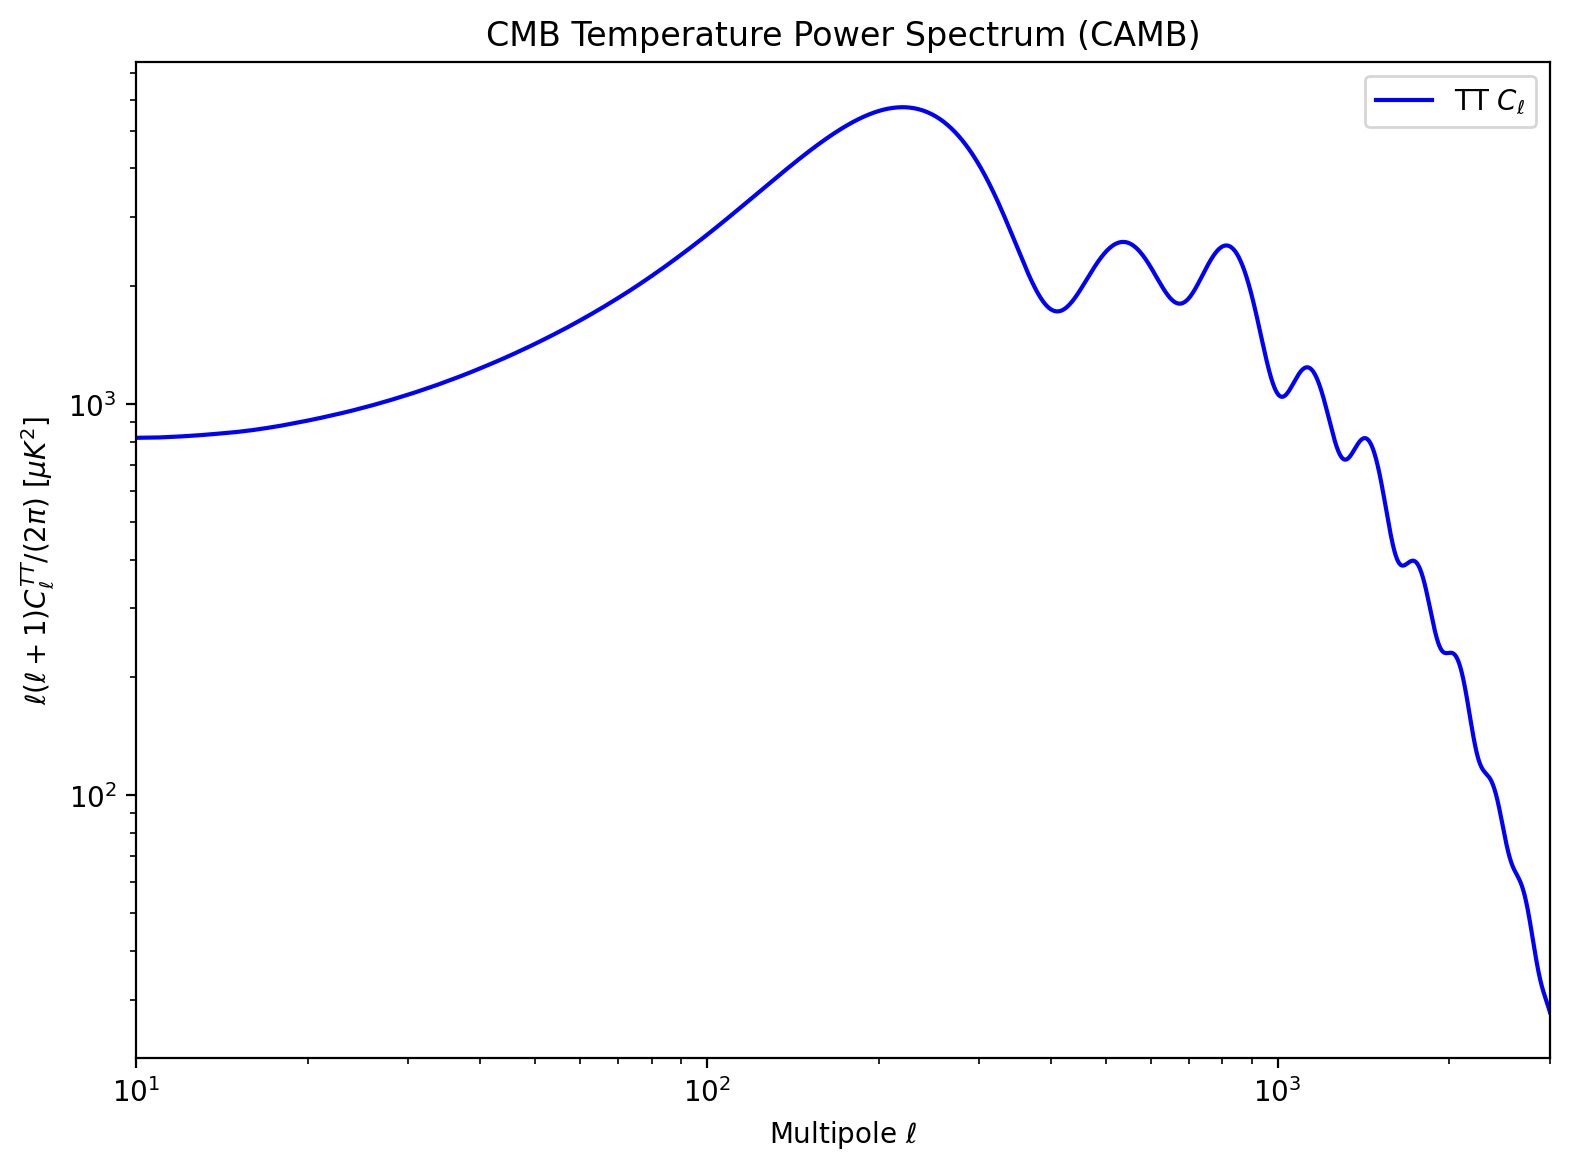

In [22]:
import camb
import matplotlib.pyplot as plt
import numpy as np

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.4, ombh2=0.02237, omch2=0.1200, tau=0.054)
pars.InitPower.set_params(As=2.1e-9, ns=0.965)
pars.set_for_lmax(3000, lens_potential_accuracy=1)

results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='K', lmax=3000)
totCL = powers['total']

ells = np.arange(totCL.shape[0])
cl_tt = totCL[:, 0] * 1e12  # Convert from K² to μK²
#cl_plot = ells * (ells + 1) * cl_tt / (2 * np.pi)

# Plot only from ell=2 onward
plt.figure(figsize=(8,6))
plt.plot(ells[2:], cl_tt[2:], label=r'TT $C_\ell$', color='blue')
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1) C_\ell^{TT}/(2\pi)$ [$\mu K^2$]')
plt.title('CMB Temperature Power Spectrum (CAMB)')
plt.yscale('log')
plt.xscale('log')
plt.xlim(10, 3000)
plt.legend()
plt.tight_layout()
plt.show()


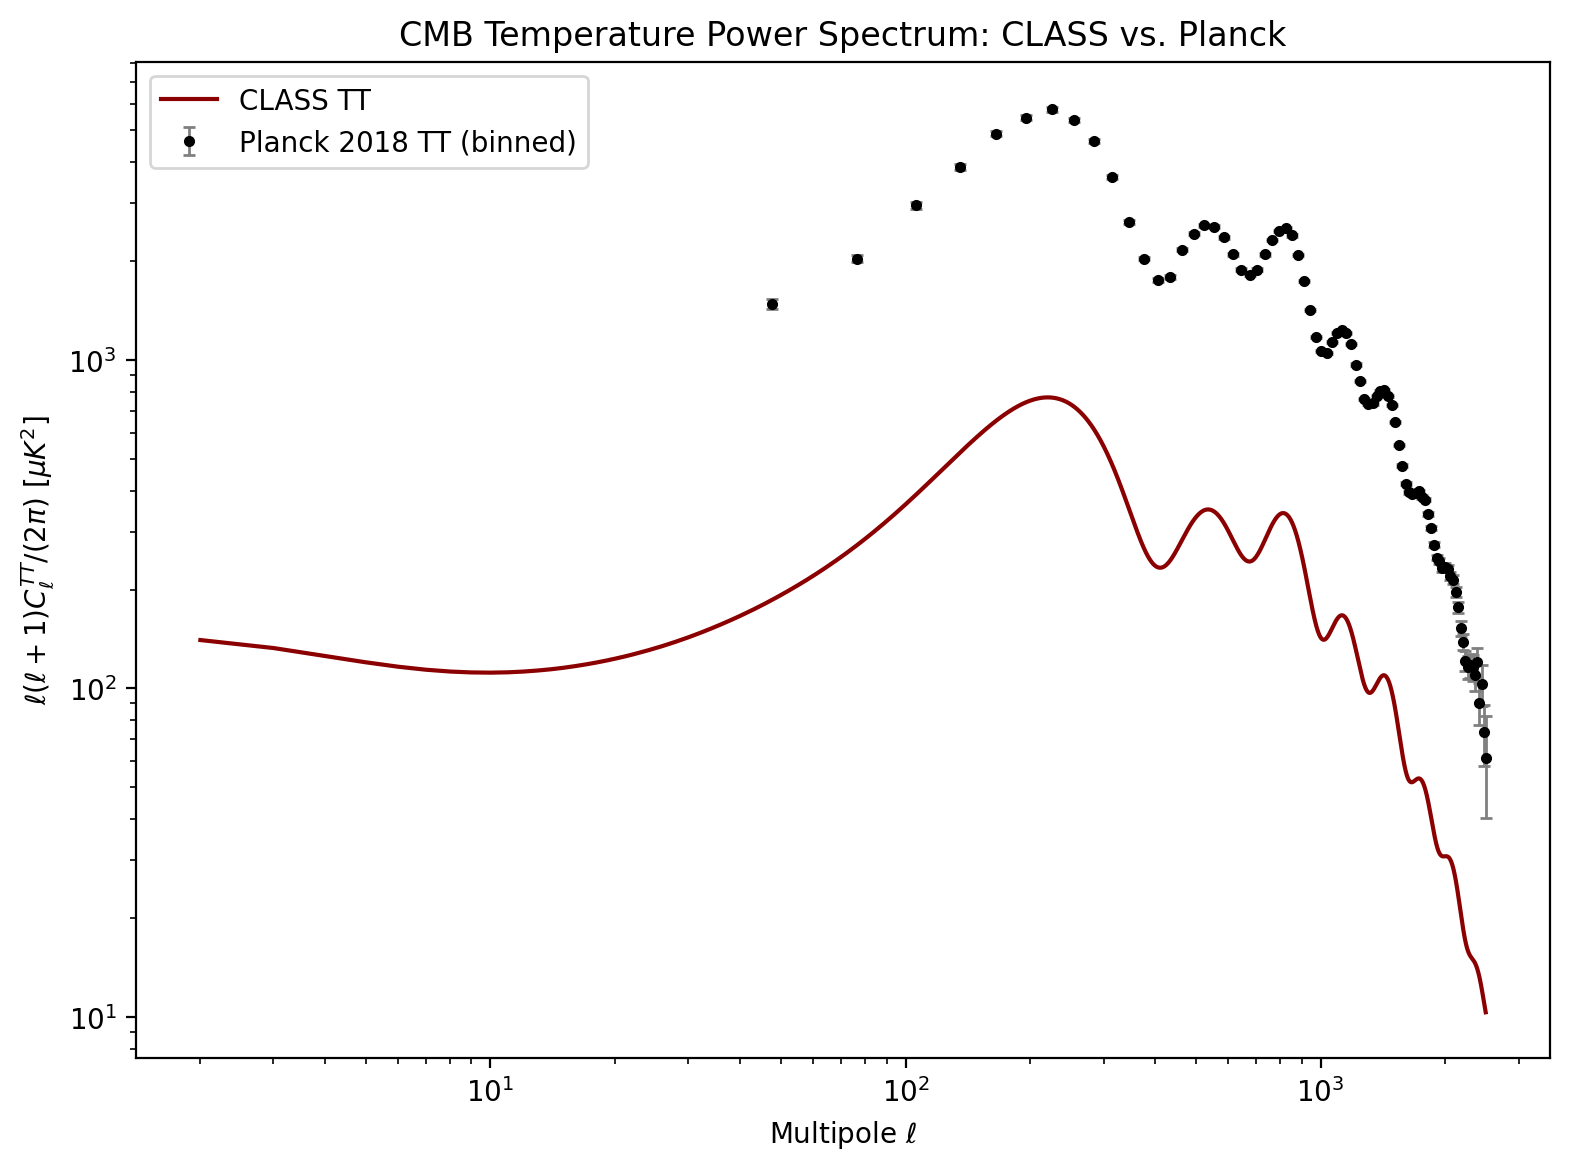

In [41]:

# import classy module
from classy import Class
import matplotlib.pyplot as plt
from math import pi

import numpy as np

# Load Planck 2018 binned TT data
planck_data = np.loadtxt("Planck_TT_data.txt")
ell_planck = planck_data[:, 0]
Dl_planck = planck_data[:, 1]
Dl_err = planck_data[:, 2]


# create instance of the class "Class"
LambdaCDM = Class()
# pass input parameters
LambdaCDM.set({'omega_b':0.022032,'omega_cdm':0.12038,'h':0.67556,'A_s':2.1e-9,'n_s':0.9619,'tau_reio':0.054})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM.compute()


# get all C_l output
cls = LambdaCDM.lensed_cl(2500)
# To check the format of cls
#print(cls.keys())

ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

# Compute spectrum in μK²
DlTT = clTT * ll * (ll + 1) / (2 * pi)*10**12

# Plot
plt.figure(figsize=(8, 6))

# CLASS spectrum
plt.plot(ll, DlTT, label='CLASS TT', color='darkred')

# Planck data
plt.errorbar(ell_planck, Dl_planck, yerr=Dl_err, fmt='o', color='black',
             ecolor='gray', elinewidth=1, capsize=2, label='Planck 2018 TT (binned)', markersize=3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/(2\pi)\ [\mu K^2]$')
plt.title('CMB Temperature Power Spectrum: CLASS vs. Planck')
plt.legend()
plt.tight_layout()
plt.savefig("class_vs_planck_tt.png", dpi=300)
plt.show()



# optional: clear content of LambdaCDM (if you want to reuse it for another parameter set)
LambdaCDM.struct_cleanup()


In [6]:
print("Max DlTT:", np.max(DlTT))


Max DlTT: 751.4347537690637


Available spectra: ['total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential']


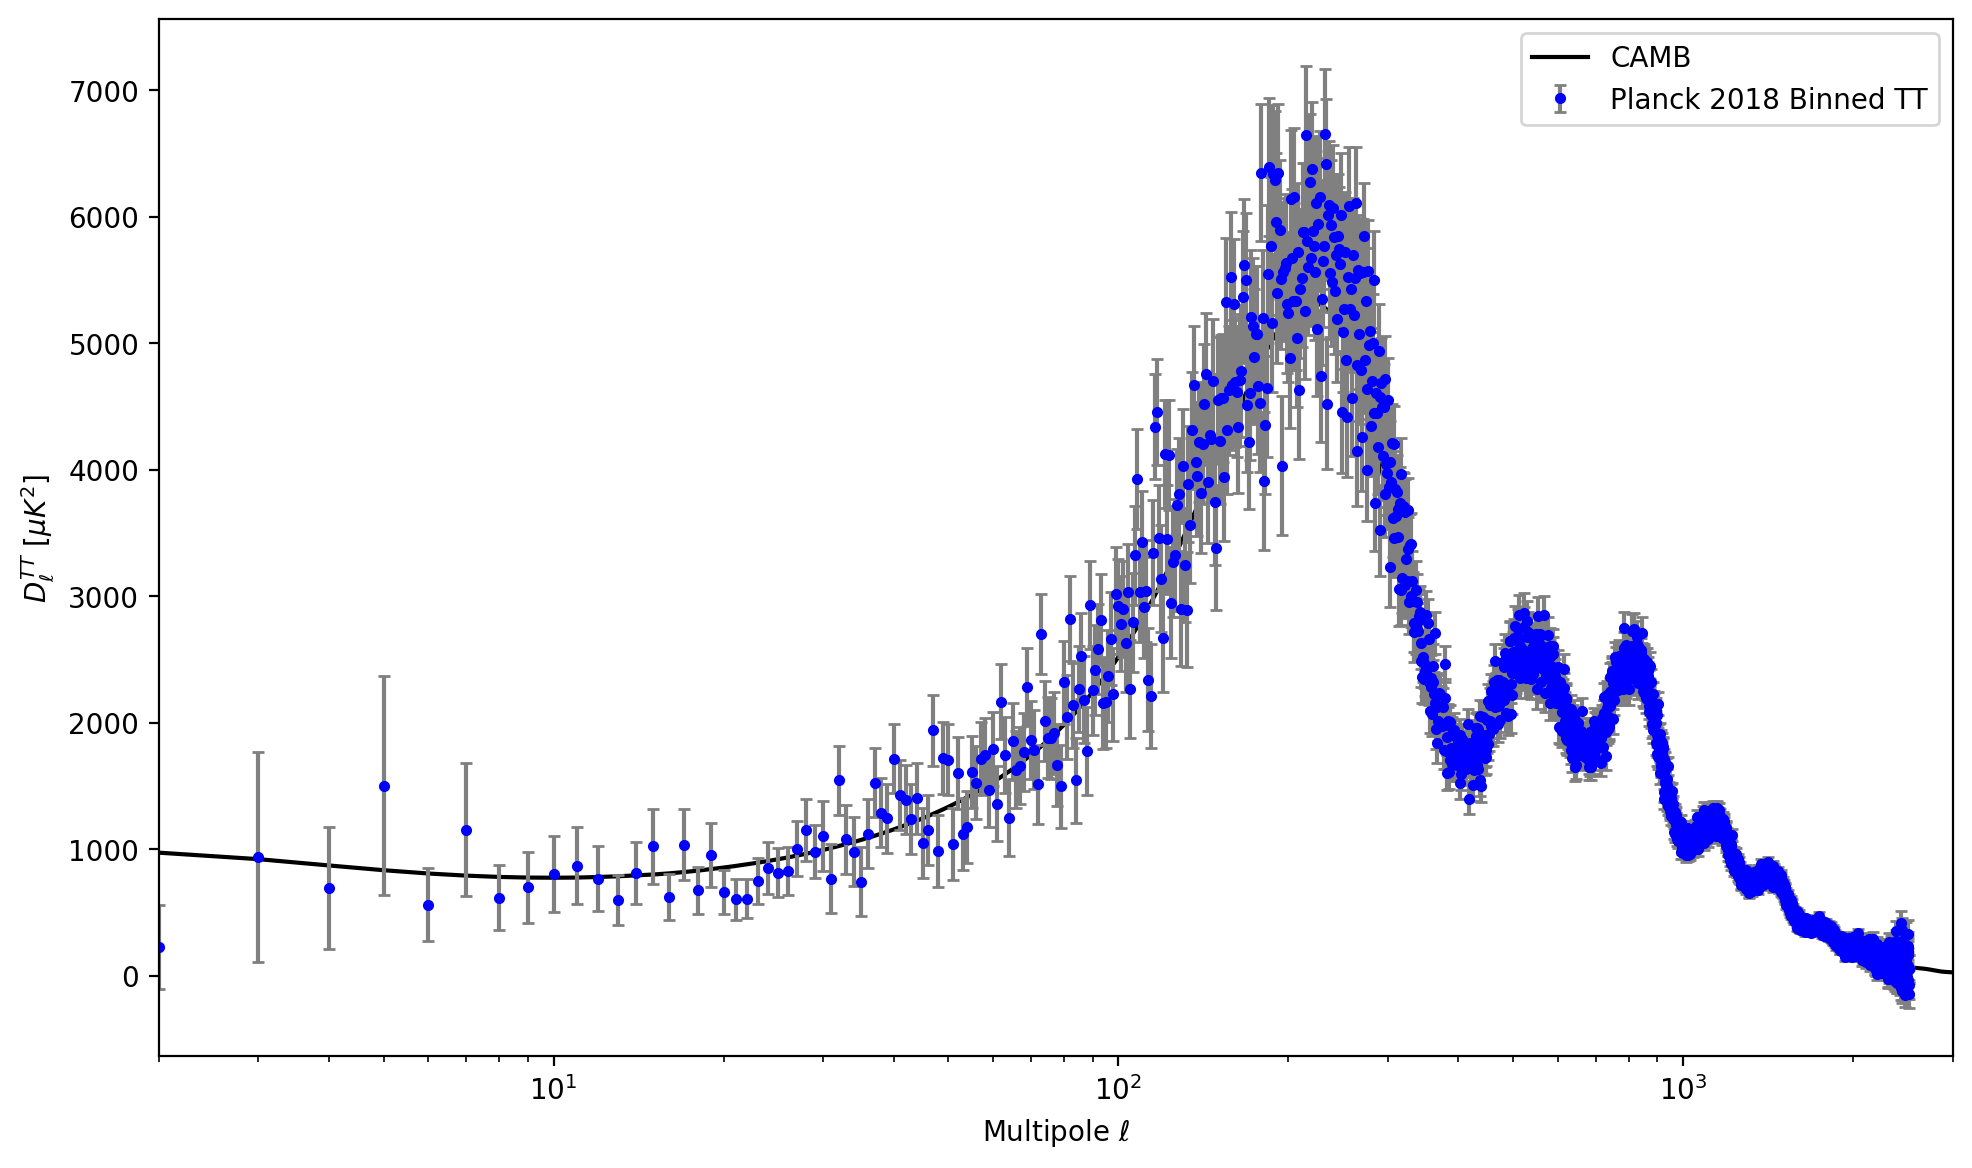

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower

#print('Using CAMB %s installed at %s' % (camb.__version__, os.path.dirname(camb.__file__)))
# Load Planck 2018 binned TT data
planck_data = np.loadtxt("COM_PowerSpect_CMB-TT-full_R3.01.txt")

# Extract columns
ell_planck = planck_data[:, 0]
Dl_planck  = planck_data[:, 1]
Dl_err_lo  = planck_data[:, 2]
Dl_err_hi  = planck_data[:, 3]

# Symmetric error bars: average of upper and lower uncertainties
Dl_err = 0.5 * (Dl_err_lo + Dl_err_hi)


# Set up parameters
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,
    As=2e-9, ns=0.965, halofit_version='mead', lmax=3000
)

# Compute results
results = camb.get_results(pars)

# Get CMB power spectra
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
print("Available spectra:", list(powers.keys()))

totCL = powers['total']
#unlensedCL = powers['unlensed_scalar']
ls = np.arange(totCL.shape[0])

# Plot TT spectrum
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(ls, totCL[:, 0], label='CAMB', color='k')
# Planck data with error bars
plt.errorbar(ell_planck, Dl_planck, yerr=Dl_err, fmt='o', markersize=3,
             label='Planck 2018 Binned TT', color='blue', ecolor='gray', capsize=2)
#ax.plot(ls, unlensedCL[:, 0], label='Unlensed', color='C2')
#ax.set_title(r'$D_\ell^{TT}\ [\mu K^2]$')
ax.set_xlabel(r'Multipole $\ell$')
ax.set_ylabel(r'$D_\ell^{TT}\ [\mu K^2]$')
ax.set_xlim(2, 3000)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend()
plt.tight_layout()
plt.savefig("TT_spec_CAMB_final")
plt.show()


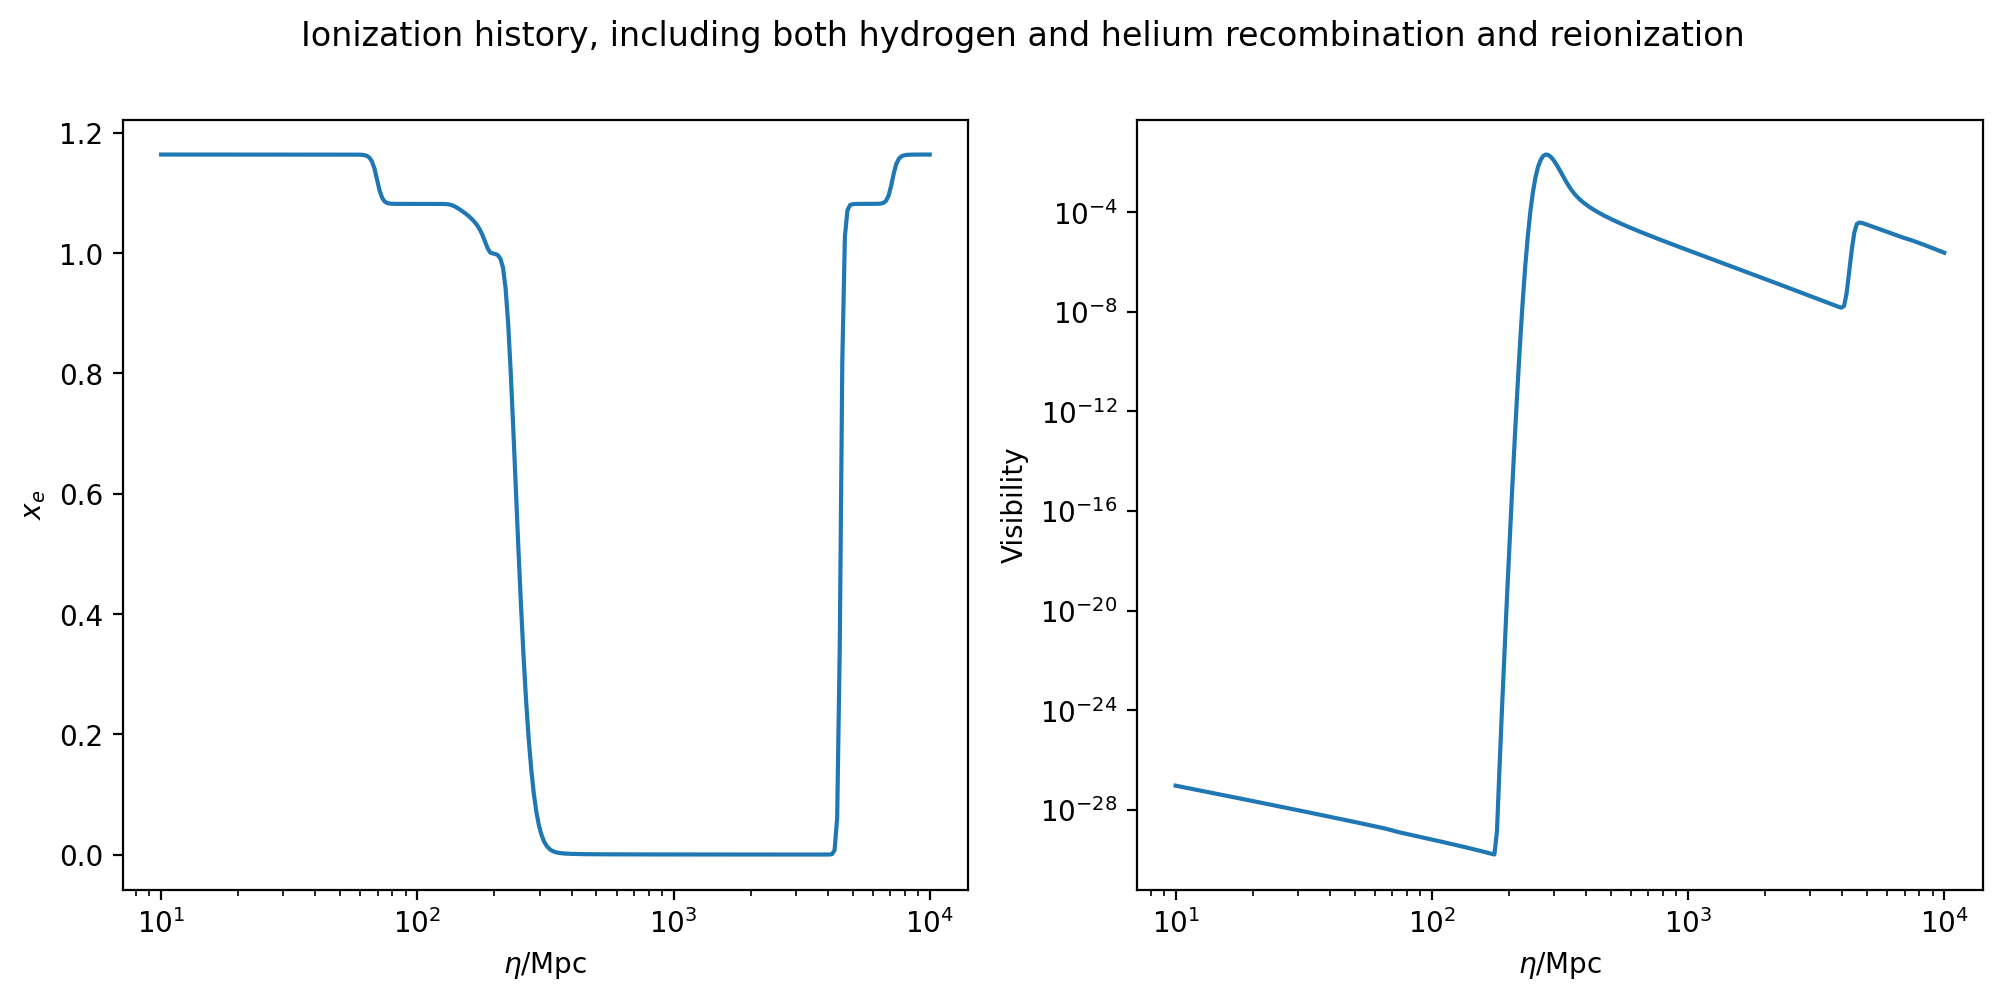

In [24]:
#set_params is a shortcut routine for setting many things at once
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, As=2e-9, ns=0.95)
data= camb.get_background(pars)

#There are functions get plot evolution of variables, e.g. for the background as a function of conformal time:
# (there is an example changing the reionization history later)
eta = 10**(np.linspace(1, 4,300))
back_ev = data.get_background_time_evolution(eta, ['x_e', 'visibility'])
fig, axs= plt.subplots(1,2, figsize=(12,5))
axs[0].semilogx(eta, back_ev['x_e'])
axs[1].loglog(eta, back_ev['visibility'])
axs[0].set_xlabel(r'$\eta/\rm{Mpc}$')
axs[0].set_ylabel('$x_e$')
axs[1].set_xlabel(r'$\eta/\rm{Mpc}$')
axs[1].set_ylabel('Visibility');
fig.suptitle('Ionization history, including both hydrogen and helium recombination and reionization');

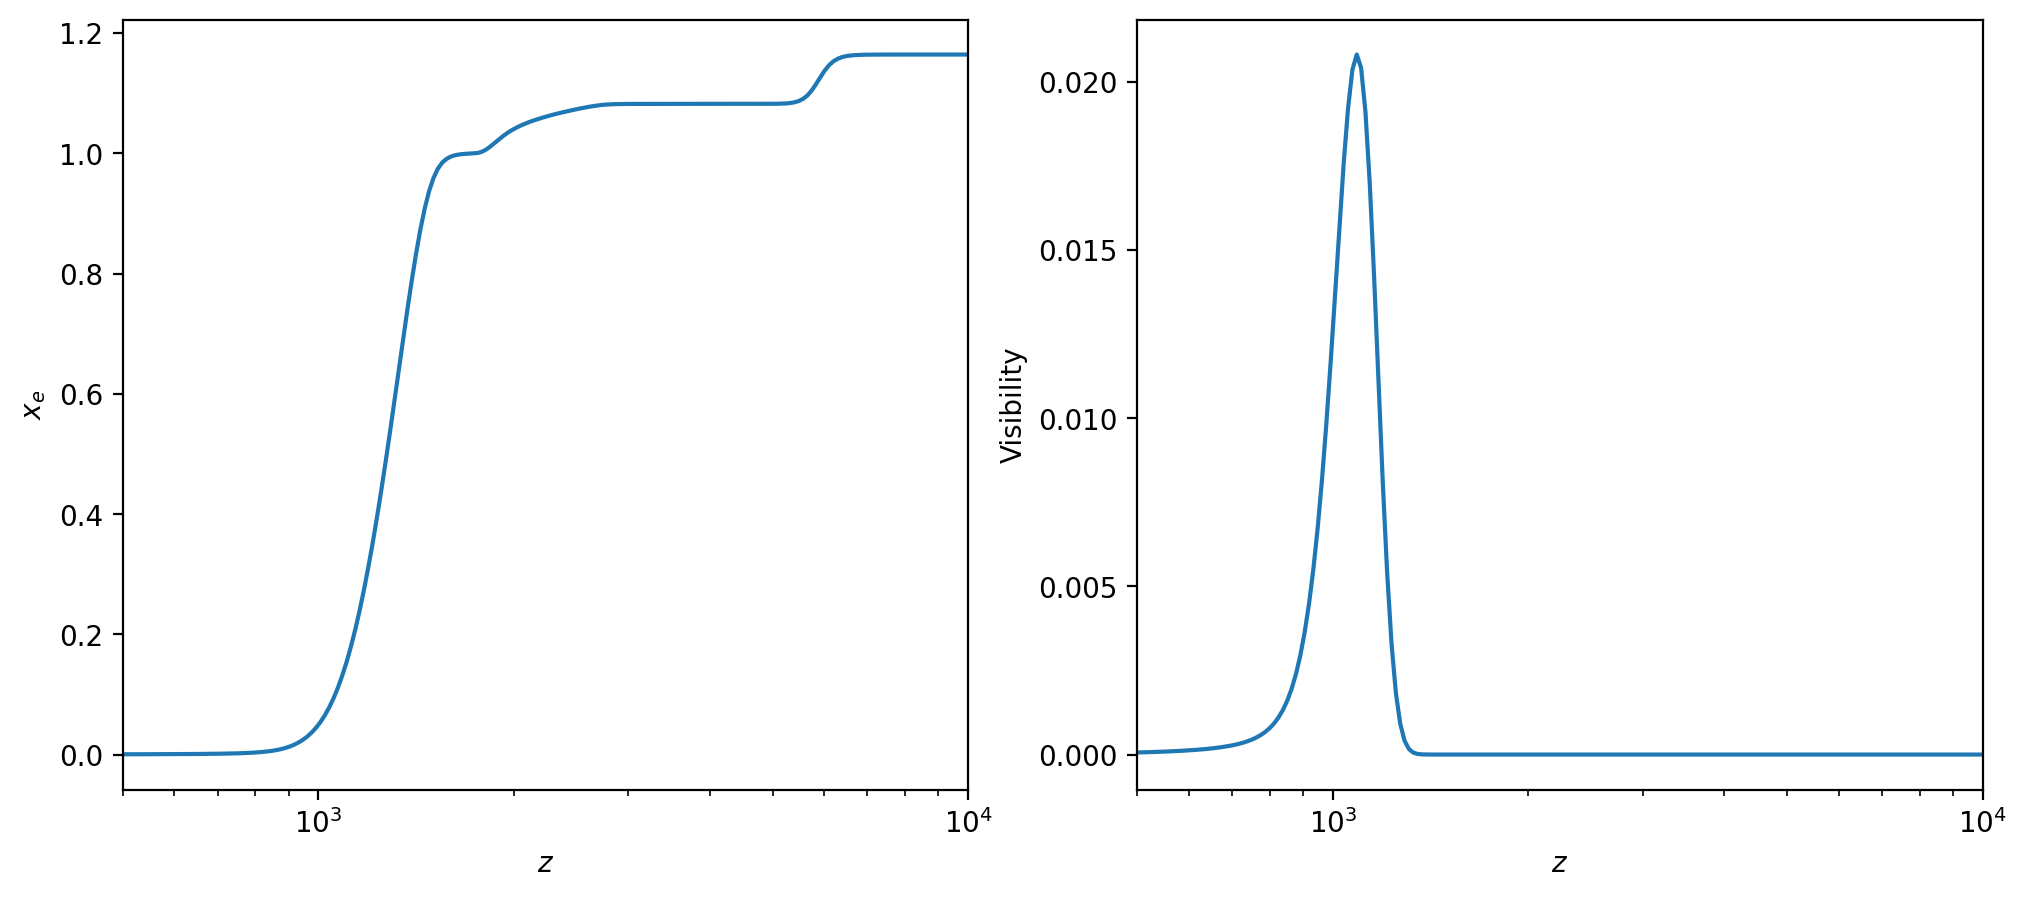

In [36]:
#or as a function of redshift
z = 10**np.linspace(2, 4, 300)
back_ev = data.get_background_redshift_evolution(z, ['x_e', 'visibility'], format='array')
fig, axs= plt.subplots(1,2, figsize=(12,5))
for i, (ax, label), in enumerate(zip(axs, ['$x_e$','Visibility'])):
    ax.semilogx(z, back_ev[:,i])
    ax.set_xlabel('$z$')
    ax.set_ylabel(label)
    ax.set_xlim([500,1e4])
    

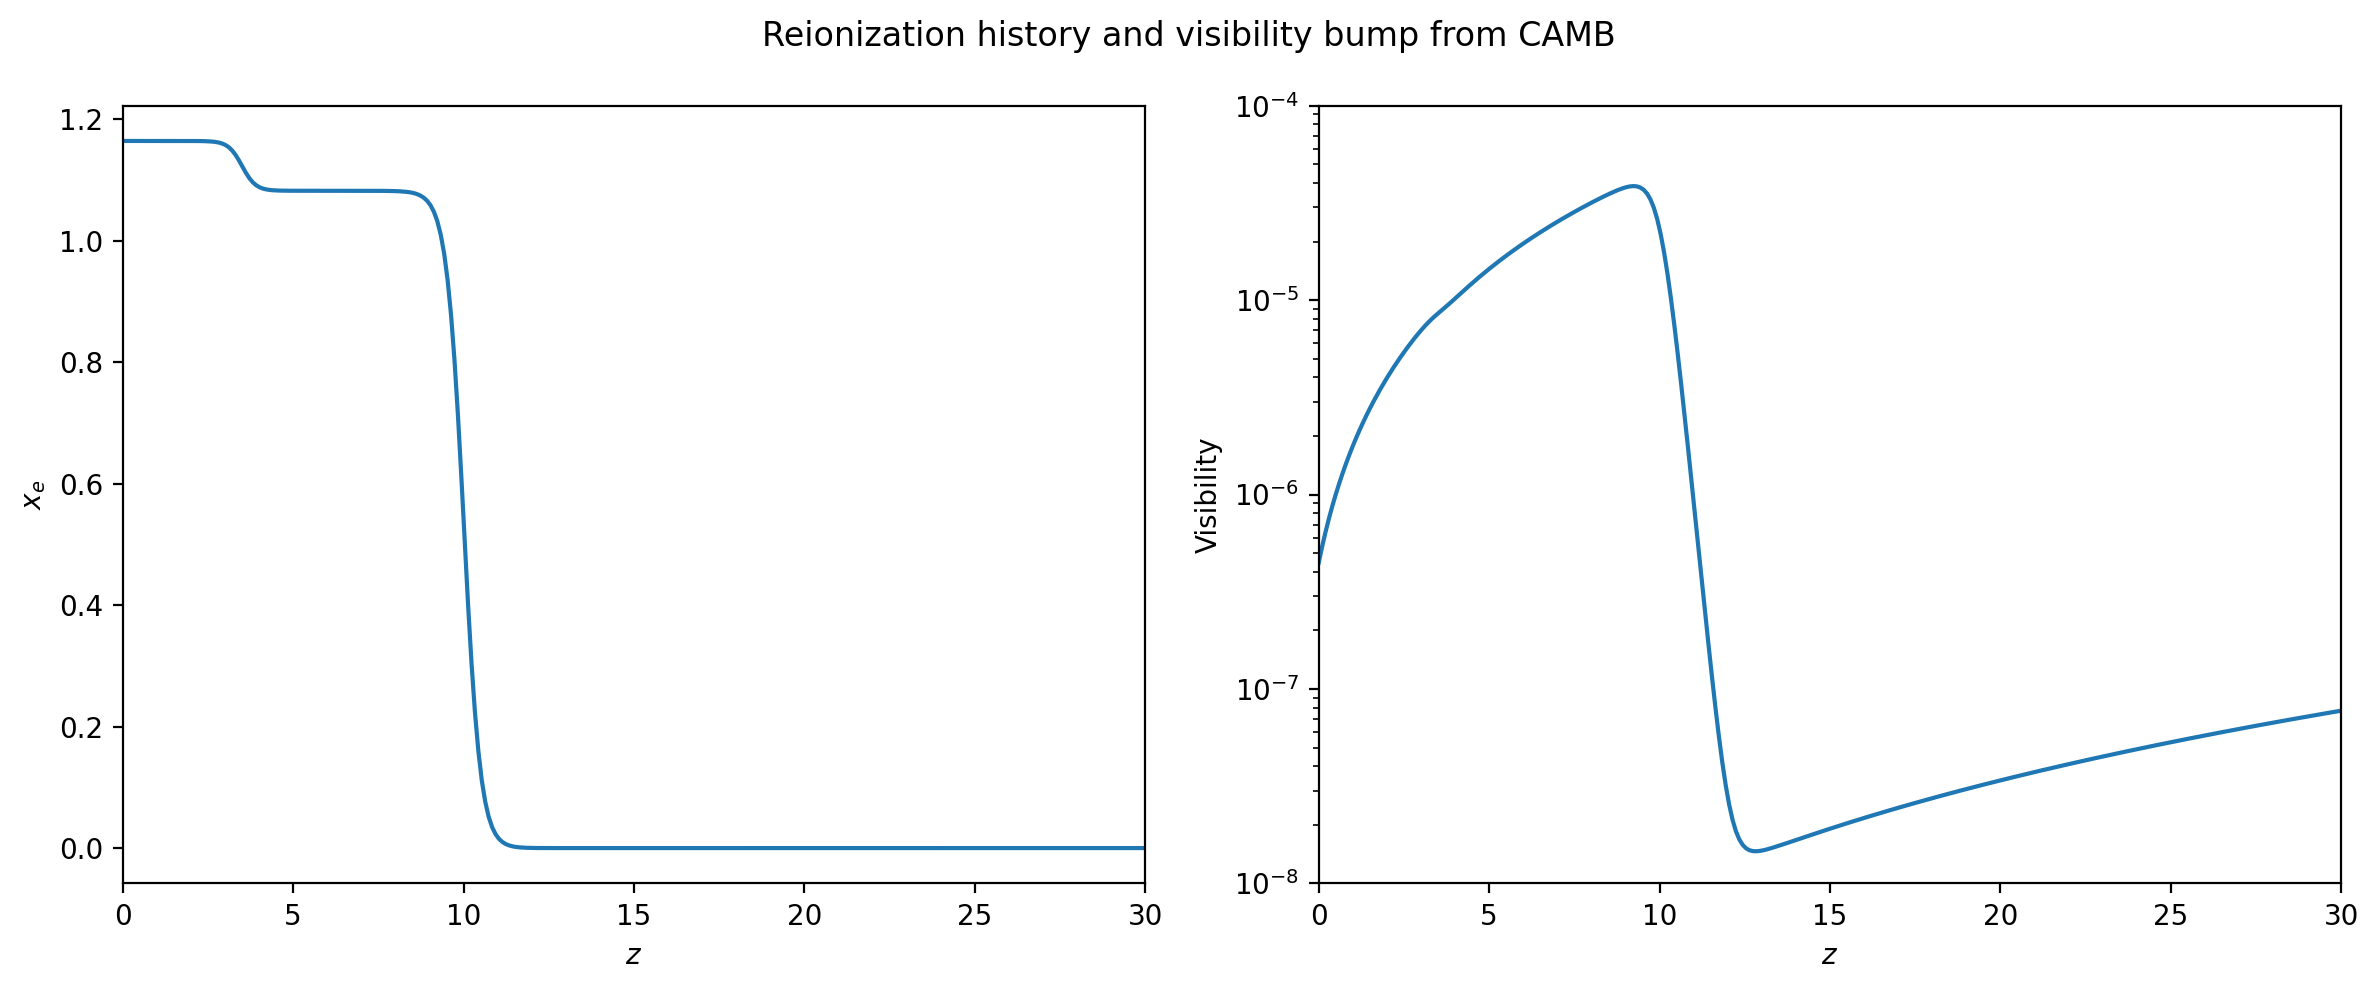

In [37]:
z = np.linspace(0, 30, 300)  # linear space better here
back_ev = data.get_background_redshift_evolution(z, ['x_e', 'visibility'], format='array')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
labels = ['$x_e$', 'Visibility']
for i, (ax, label) in enumerate(zip(axs, labels)):
    ax.plot(z, back_ev[:, i])
    ax.set_xlabel('$z$')
    ax.set_ylabel(label)
    ax.set_xlim([0, 30])
    if label == 'Visibility':
        ax.set_yscale('log')  # log scale helps visibility
        ax.set_ylim([1e-8, 1e-4])

fig.suptitle('Reionization history and visibility bump from CAMB')
plt.tight_layout()
plt.savefig("Visibility bump at Reionization")
plt.show()


In [4]:
from classy import Class
import numpy as np

cosmo = Class()
cosmo.set({
    'output': 'mTk',
    'l_max_lss': 300,                    # ✅ CLASS-compliant multipole max
    'P_k_max_1/Mpc': 1.0,
    'k_output_values': '0.1',
    'omega_b': 0.02237,
    'omega_cdm': 0.1200,
    'h': 0.674,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'tau_reio': 0.054,
})
cosmo.compute()

transfers = cosmo.get_transfer(z=1100)
print("✅ Keys:", list(transfers.keys()))

q = np.array(transfers['q'])  # ℓ values
print("q shape:", q.shape)

for name in ['t0', 't1', 't2']:
    if name in transfers:
        print(f"{name} shape:", np.array(transfers[name]).shape)
    else:
        print(f"{name} not found.")


CosmoSevereError: 

Error in Class: Class did not read input parameter(s): l_max_lss


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb.sources import get_sources
from camb import model

# Set up parameters
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,
                   As=2e-9, ns=0.965)
pars.set_for_lmax(3000, lens_potential_accuracy=0)
pars.WantTensors = False
pars.SourceTerms.counts = False  # turn off lensing source term

# Get source terms
source_results = get_sources(pars)

# ℓ values
ells = np.arange(source_results.source_shape[0])
tau, sources = source_results.get_source_function(source_index=0, ell=ells)  # 0=temperature

print("Available source terms:", source_results.source_functions)

# Each slice: sources[ell, tau_index, component_index]
# For temperature, component_index: 0 = total, 1 = SW, 2 = Doppler, 3 = ISW...

# Plot monopole (SW), dipole (Doppler), and ISW at a fixed ell
ℓ_target = 200  # First peak
ell_idx = np.where(ells == ℓ_target)[0][0]

SW = sources[ell_idx,:,1]
Doppler = sources[ell_idx,:,2]
ISW = sources[ell_idx,:,3]
eta = tau

plt.figure(figsize=(10,6))
plt.plot(eta, SW, '--', label='Sachs-Wolfe')
plt.plot(eta, Doppler, ':', label='Doppler')
plt.plot(eta, ISW, '-.', label='ISW')
plt.plot(eta, SW + Doppler + ISW, '-', label='Total')
plt.xlabel(r'Conformal time $\eta$ [Mpc]')
plt.ylabel('Source function (arb. units)')
plt.title(f'Temperature Source Terms at ℓ = {ℓ_target}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ImportError: cannot import name 'get_sources' from 'camb.sources' (/home/swanith/.local/lib/python3.10/site-packages/camb/sources.py)

In [8]:
import camb
import camb.sources as sources

print(dir(sources))


['F2003Class', 'GaussianSourceWindow', 'POINTER', 'SourceWindow', 'SplinedSourceWindow', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'byref', 'c_double', 'c_int', 'fortran_class', 'np', 'numpy_1d', 'numpy_1d_or_null', 'numpy_2d']


In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

cosmo = Class()
cosmo.set({
    'output': 'tCl,mTk',
    'P_k_max_1/Mpc': 5.0,
    'k_output_values': '0.1',     # one k-mode for simplicity
    'l_max_scalars': 10,
    'omega_b': 0.02237,
    'omega_cdm': 0.1200,
    'h': 0.674,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'tau_reio': 0.054,
})
cosmo.compute()


In [ ]:
transfers = cosmo.get_transfer(z=1100)  # Last scattering
#ell = np.array(transfers['q'])
#T0 = np.array(transfers['t0'])          # Sachs-Wolfe
#T1 = np.array(transfers['t1'])          # Doppler


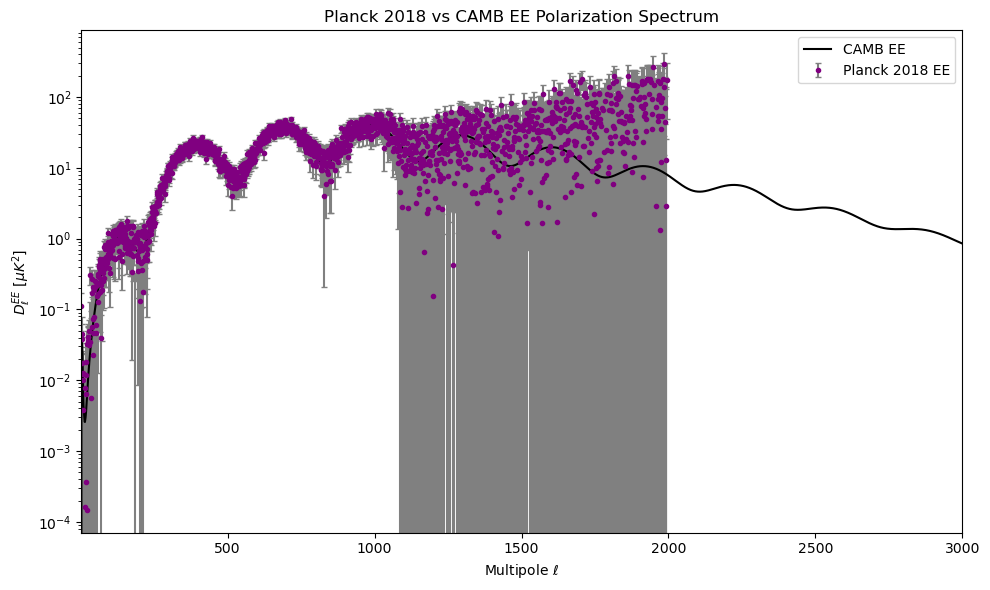

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model, initialpower

# Load Planck EE data
data = np.loadtxt("COM_PowerSpect_CMB-EE-full_R3.01.txt")
ell_planck = data[:, 0]
Dl_ee = data[:, 1]
Dl_err = data[:, 2]

# CAMB setup
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,
    As=2e-9, ns=0.965, halofit_version='mead', lmax=3000
)
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL = powers['total']
ls = np.arange(totCL.shape[0])
Dl_ee_camb = totCL[:, 1] 

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(ell_planck, Dl_ee, yerr=Dl_err, fmt='o', markersize=3,
             label='Planck 2018 EE', color='purple', ecolor='gray', capsize=2)
plt.plot(ls, Dl_ee_camb, label='CAMB EE', color='black')
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$D_\ell^{EE} \ [\mu K^2]$')
plt.title('Planck 2018 vs CAMB EE Polarization Spectrum')
plt.yscale('log')
plt.xlim(2, 3000)
plt.legend()
plt.savefig("EE_CAMB_PLANCK")
plt.tight_layout()
plt.show()


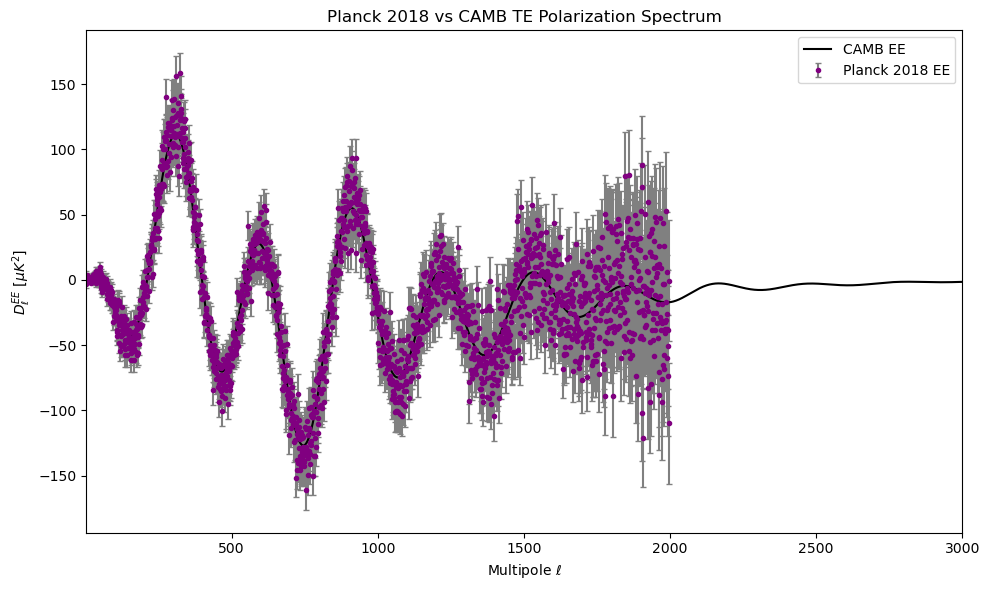

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model, initialpower

# Load Planck EE data
data = np.loadtxt("COM_PowerSpect_CMB-TE-full_R3.01.txt")
ell_planck = data[:, 0]
Dl_ee = data[:, 1]
Dl_err = data[:, 2]

# CAMB setup
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,
    As=2e-9, ns=0.965, halofit_version='mead', lmax=3000
)
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL = powers['total']
ls = np.arange(totCL.shape[0])
Dl_ee_camb = totCL[:, 3] 

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(ell_planck, Dl_ee, yerr=Dl_err, fmt='o', markersize=3,
             label='Planck 2018 EE', color='purple', ecolor='gray', capsize=2)
plt.plot(ls, Dl_ee_camb, label='CAMB EE', color='black')
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$D_\ell^{EE} \ [\mu K^2]$')
plt.title('Planck 2018 vs CAMB TE Polarization Spectrum')
plt.xlim(2, 3000)
plt.legend()
plt.tight_layout()
plt.savefig("CAMB_TE_PLANCK")
plt.show()


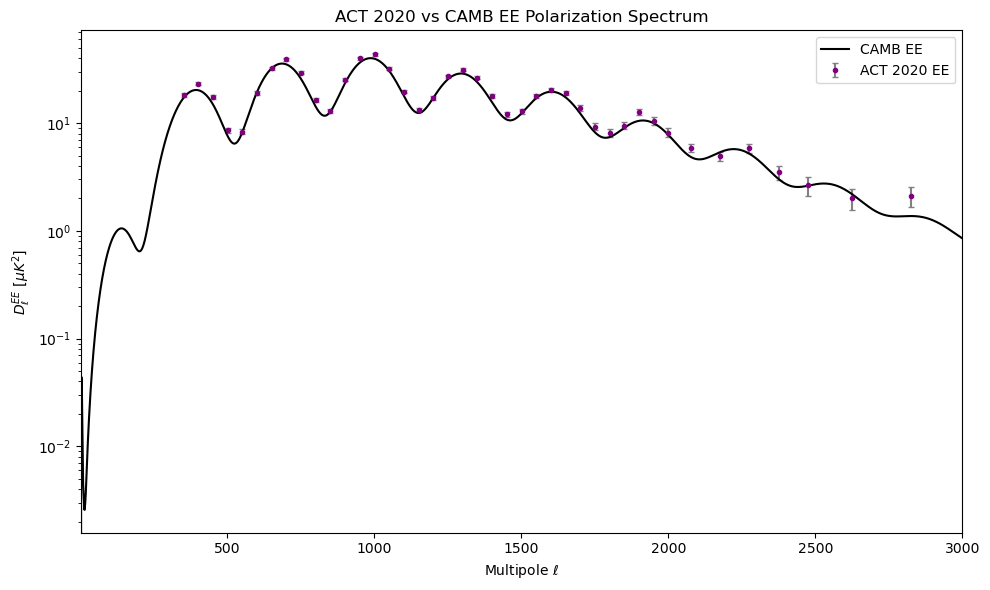

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model, initialpower

# Load Planck EE data
data = np.loadtxt("act_dr4.01_D_ell_EE_cmbonly.txt")
ell_planck = data[:, 0]
Dl_ee = data[:, 1]
Dl_err = data[:, 2]

# CAMB setup
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,
    As=2e-9, ns=0.965, halofit_version='mead', lmax=3000
)
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL = powers['total']
ls = np.arange(totCL.shape[0])
Dl_ee_camb = totCL[:, 1] 

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(ell_planck, Dl_ee, yerr=Dl_err, fmt='o', markersize=3,
             label='ACT 2020 EE', color='purple', ecolor='gray', capsize=2)
plt.plot(ls, Dl_ee_camb, label='CAMB EE', color='black')
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$D_\ell^{EE} \ [\mu K^2]$')
plt.title('ACT 2020 vs CAMB EE Polarization Spectrum')
plt.yscale('log')
plt.xlim(2, 3000)
plt.legend()
plt.tight_layout()
plt.savefig("ACT_CAMB_EE")
plt.show()


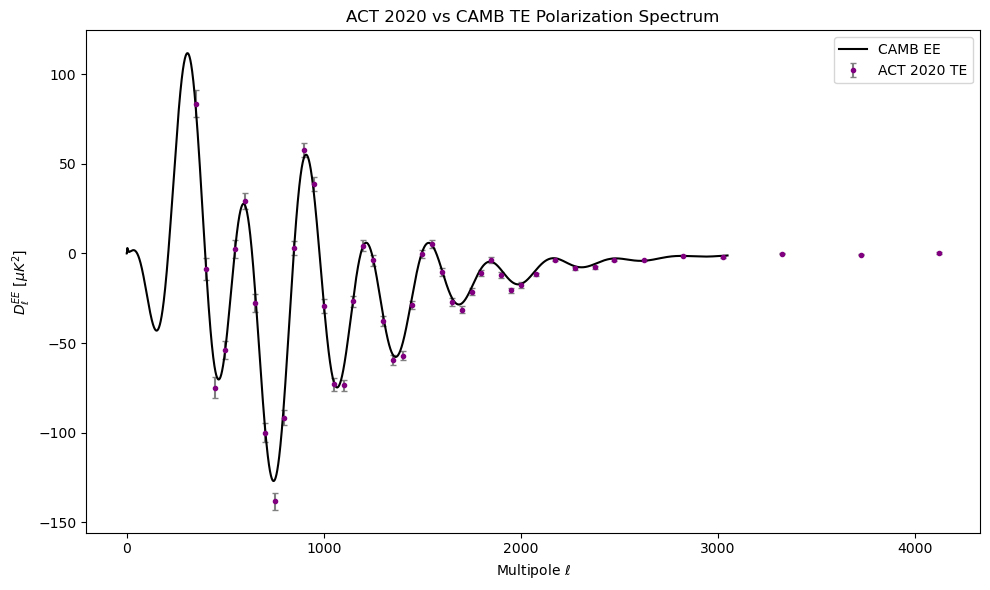

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model, initialpower

# Load Planck EE data
data = np.loadtxt("act_dr4.01_D_ell_TE_cmbonly.txt")
ell_planck = data[:, 0]
Dl_ee = data[:, 1]
Dl_err = data[:, 2]

# CAMB setup
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,
    As=2e-9, ns=0.965, halofit_version='mead', lmax=3000
)
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL = powers['total']
ls = np.arange(totCL.shape[0])
Dl_ee_camb = totCL[:, 3] 

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(ell_planck, Dl_ee, yerr=Dl_err, fmt='o', markersize=3,
             label='ACT 2020 TE', color='purple', ecolor='gray', capsize=2)
plt.plot(ls, Dl_ee_camb, label='CAMB EE', color='black')
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$D_\ell^{EE} \ [\mu K^2]$')
plt.title('ACT 2020 vs CAMB TE Polarization Spectrum')
plt.legend()
plt.tight_layout()
plt.savefig("TE_ACT_CAMB")
plt.show()


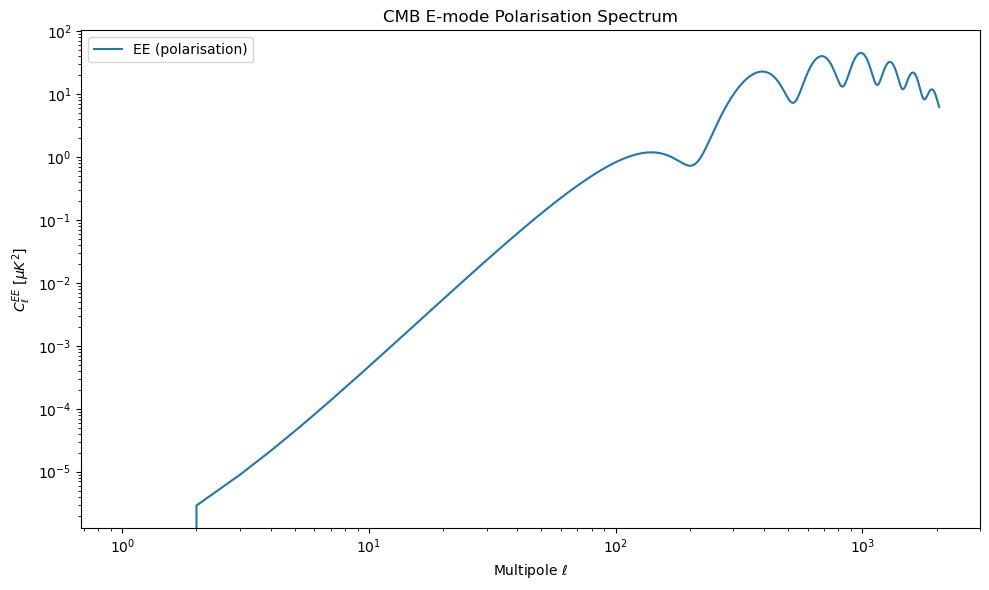

In [20]:
import camb
from camb import model, initialpower
import numpy as np
import matplotlib.pyplot as plt
#import ace_tools as tools

# Set up cosmological parameters
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.00)
pars.InitPower.set_params(As=2e-9, ns=0.965)
pars.WantTensors = False
pars.set_for_lmax(2000, lens_potential_accuracy=0)

# Set up transfer outputs to extract contributions
pars.set_accuracy(AccuracyBoost=2.0)
pars.WantTransfer = True
pars.WantCls = True
pars.Want_CMB_lensing = False
pars.WantScalars = True

results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

# Extract EE spectrum
ells = np.arange(powers['total'].shape[0])
EE = powers['total'][:, 1]

# Plot EE power spectrum to illustrate velocity-induced polarisation
plt.figure(figsize=(10, 6))
plt.plot(ells, EE, label='EE (polarisation)', color='tab:blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$C_\ell^{EE}$ [$\mu K^2$]')
plt.title('CMB E-mode Polarisation Spectrum')
#plt.grid(True, which='both', ls='--', lw=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import camb
import os

# Output directory
os.makedirs("frames_tau_variation", exist_ok=True)

tau_values = np.linspace(0.02, 0.10, 10)
#ls = np.arange(2, 3001)
#factor = ls * (ls + 1) / (2 * np.pi)
totCL = results.get_cmb_power_spectra(pars, CMB_unit='muK')['total']
ls = np.arange(totCL.shape[0])

for i, tau in enumerate(tau_values):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, tau=tau)
    pars.InitPower.set_params(As=2e-9, ns=0.965)
    pars.set_for_lmax(3000, lens_potential_accuracy=1)
    pars.WantTensors = True
    results = camb.get_results(pars)
    totCL = results.get_cmb_power_spectra(pars, CMB_unit='muK')['total']
    
    Dl_tt = np.sqrt(totCL[2:, 0])# * factor[2:])
    Dl_ee = np.sqrt(totCL[2:, 1] )#* factor[2:])
    Dl_bb = np.sqrt(np.abs(totCL[2:, 2]))# * factor[2:]))
    Dl_te = np.sign(totCL[2:, 3]) * np.sqrt(np.abs(totCL[2:, 3]))/(Dl_tt*Dl_ee)**0.5#* factor[2:]))

    plt.figure(figsize=(10, 6))
    plt.loglog(ls[2:], Dl_tt, label='TT', color='gold')
    plt.loglog(ls[2:], Dl_ee, label='EE', color='deeppink')
    plt.loglog(ls[2:], Dl_bb, label='BB', color='blue')
    plt.plot(ls[2:], Dl_te, label='TE', color='limegreen')
    #plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel(r'Multipole $\ell$')
    plt.ylabel(r'$\Delta T\ (\mu K)$')
    plt.title(f"CMB Spectra (τ = {tau:.3f})")
    #plt.ylim(0.1, 100)
    #plt.xlim(2, 3000)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"frames_tau_variation/frame_{i:02d}.png")
    plt.close()


In [32]:
import imageio.v2 as imageio
filenames = [f"frames_tau_variation/frame_{i:02d}.png" for i in range(len(tau_values))]
with imageio.get_writer('cmb_tau_variation.gif', mode='I', duration=0.5) as writer:
    for filename in filenames:
        writer.append_data(imageio.imread(filename))


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import camb
import os

# Create folder to save frames
os.makedirs("frames_r_variation", exist_ok=True)

# Values of r to sweep over
r_values = np.linspace(0.0, 0.2, 10)

for i, r in enumerate(r_values):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, tau=0.06)
    pars.InitPower.set_params(As=2e-9, ns=0.965, r=r)
    pars.set_for_lmax(3000)
    pars.WantTensors = True

    results = camb.get_results(pars)
    totCL = results.get_cmb_power_spectra(pars, CMB_unit='muK')['total']

    ls = np.arange(totCL.shape[0])
    #factor = ls * (ls + 1) / (2 * np.pi)
    ls = ls[2:]

    Dl_tt = np.sqrt(totCL[2:, 0] )
    Dl_ee = np.sqrt(totCL[2:, 1] )
    Dl_bb = np.sqrt(np.abs(totCL[2:, 2]))
    Dl_te = np.sign(totCL[2:, 3]) * np.sqrt(np.abs(totCL[2:, 3] ))

    plt.figure(figsize=(10, 6))
    plt.plot(ls, Dl_tt, label='TT', color='gold')
    plt.plot(ls, Dl_ee, label='EE', color='deeppink')
    plt.plot(ls, Dl_bb, label='BB', color='blue')
    plt.plot(ls, Dl_te, label='TE', color='limegreen')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(2, 3000)
    plt.ylim(0.1, 100)
    plt.xlabel(r'Multipole $\ell$')
    plt.ylabel(r'$\Delta T\ (\mu K)$')
    plt.title(f'CMB Spectra (r = {r:.3f})')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"frames_r_variation/frame_{i:02d}.png")
    plt.close()


In [34]:
import imageio.v2 as imageio
filenames = [f"frames_r_variation/frame_{i:02d}.png" for i in range(len(r_values))]

with imageio.get_writer("cmb_r_variation.gif", mode='I', duration=0.5) as writer:
    for file in filenames:
        writer.append_data(imageio.imread(file))


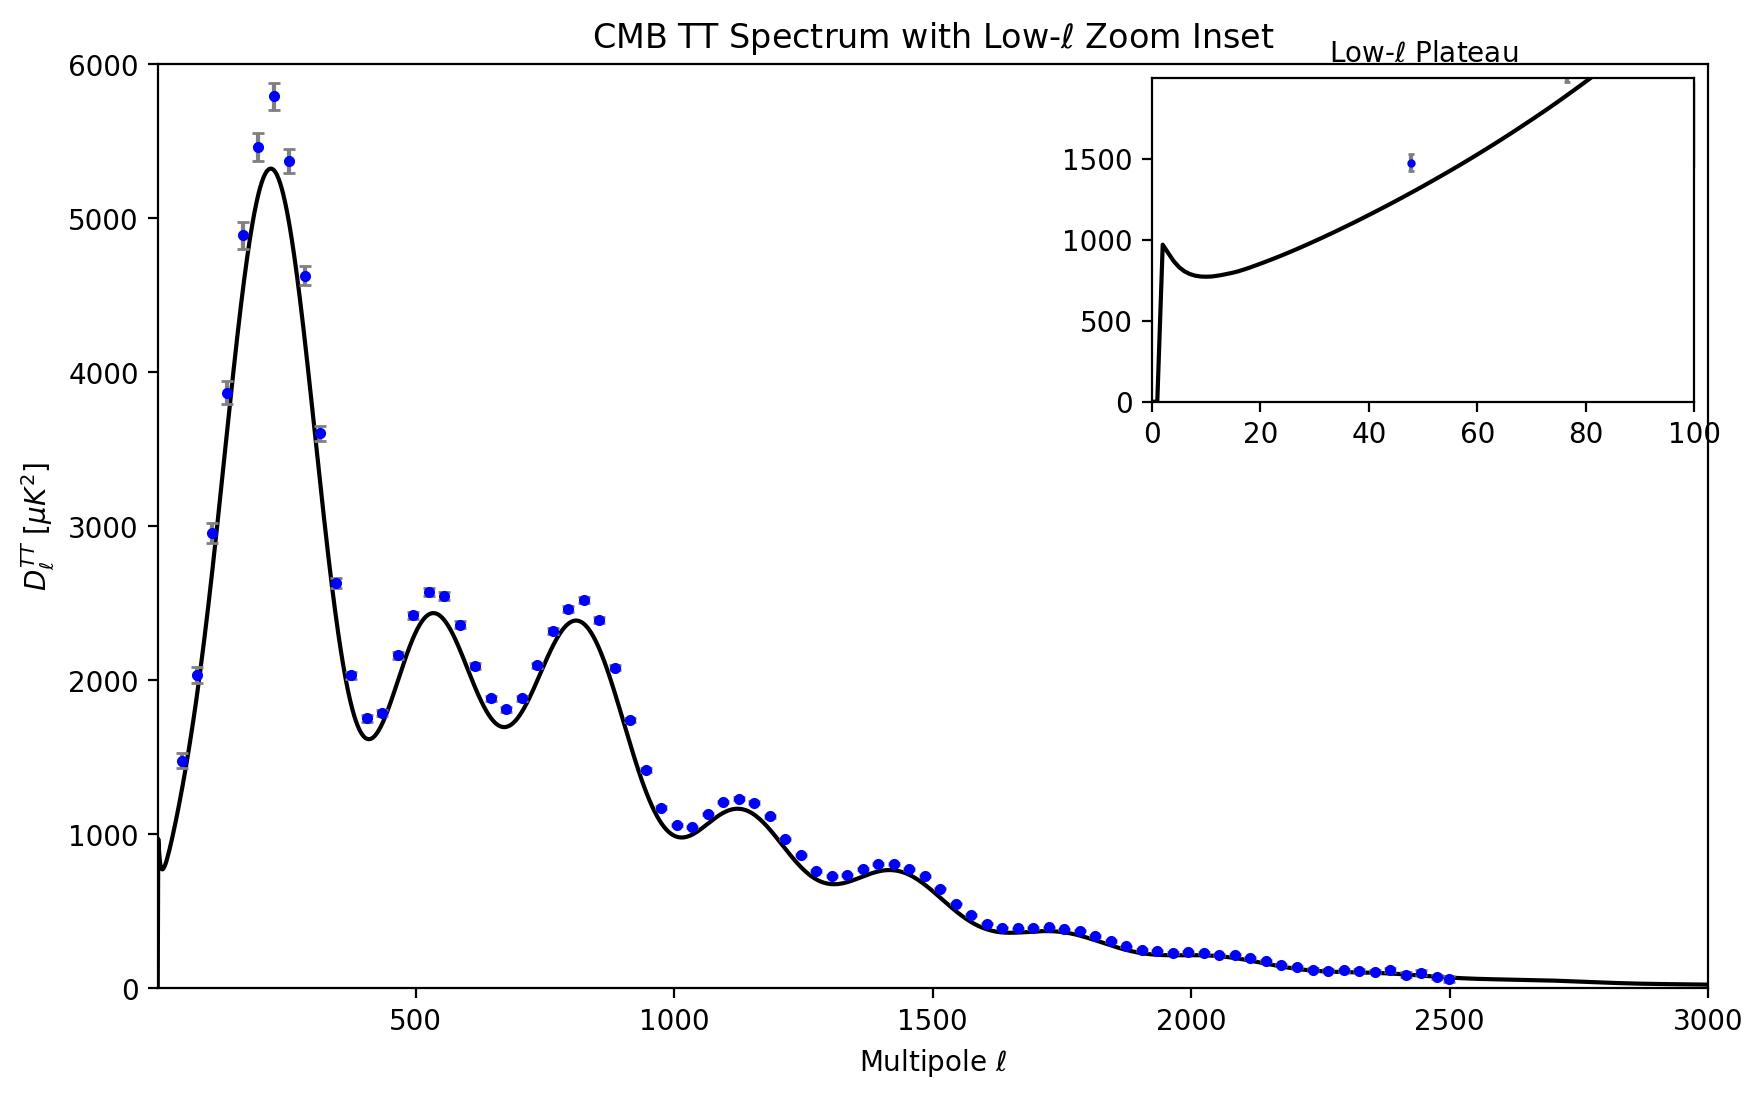

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import camb
from camb import model, initialpower

# Load Planck 2018 binned TT data
planck_data = np.loadtxt("Planck_TT_data.txt")
ell_planck = planck_data[:, 0]
Dl_planck = planck_data[:, 1]
Dl_err = planck_data[:, 2]

# Set up CAMB parameters
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,
    As=2e-9, ns=0.965, halofit_version='mead', lmax=3000
)
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL = powers['total']
ls = np.arange(totCL.shape[0])
Dl_camb = totCL[:, 0]

# Main plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ls, Dl_camb, label='CAMB', color='k')
ax.errorbar(ell_planck, Dl_planck, yerr=Dl_err, fmt='o', markersize=3,
             label='Planck 2018 Binned TT', color='blue', ecolor='gray', capsize=2)

ax.set_xlabel(r'Multipole $\ell$')
ax.set_ylabel(r'$D_\ell^{TT}~[\mu K^2]$')
ax.set_xlim(2, 3000)
ax.set_ylim(0, 6000)
ax.set_title('CMB TT Spectrum with Low-$\ell$ Zoom Inset')
ax.legend()

# Inset zoom on low-ell
axins = inset_axes(ax, width="35%", height="35%", loc='upper right')

axins.plot(ls, Dl_camb, color='k')
axins.errorbar(ell_planck, Dl_planck, yerr=Dl_err, fmt='o', markersize=2,
               color='blue', ecolor='gray', capsize=1)
axins.set_xlim(2, 100)
axins.set_ylim(0, 2000)
axins.set_xticks([0, 20, 40, 60, 80, 100])
axins.set_yticks([0, 500, 1000, 1500])
axins.set_title("Low-$\ell$ Plateau", fontsize=10)

#plt.tight_layout()
plt.savefig("TT_spec_CAMB_inset.png")
plt.show()
